## LOANS


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


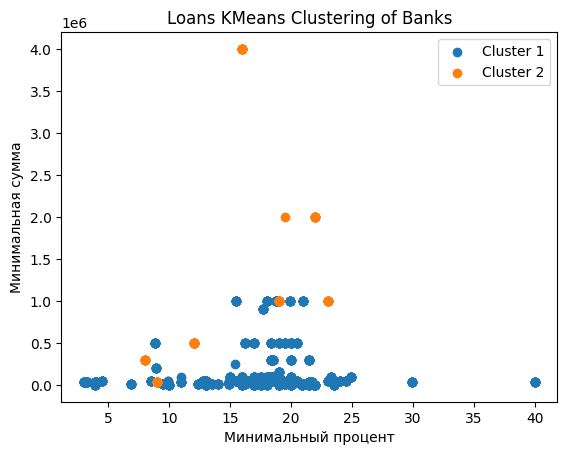

In [81]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Загружаем данные
df = pd.read_csv('/content/sample_data/ALL_loans_1_year.csv', delimiter=',')

# Выбираем только числовые признаки для кластеризации
numeric_features = ['Минимальный процент', 'Максимальный процент', 'Минимальный возраст', 'Минимальная сумма', 'Максимальная сумма']


# Выбираем только числовые признаки для кластеризации
X = df[numeric_features]

# Стандартизируем признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Указываем количество кластеров
num_clusters = 2

# Применяем кластеризацию KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Визуализируем кластеры
for cluster_id in range(num_clusters):
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data[numeric_features[0]], cluster_data[numeric_features[3]], label=f'Cluster {cluster_id+1}')

plt.xlabel(numeric_features[0])
plt.ylabel(numeric_features[3])
plt.title('Loans KMeans Clustering of Banks')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


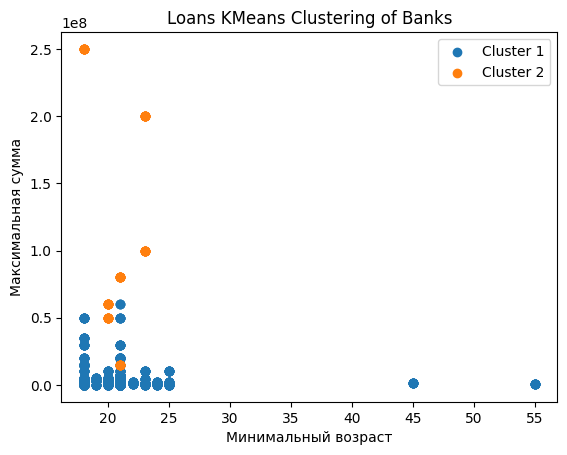

In [86]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Загружаем данные
df = pd.read_csv('/content/sample_data/ALL_loans_1_year.csv', delimiter=',')

# Выбираем только числовые признаки для кластеризации
numeric_features = ['Минимальный процент', 'Максимальный процент', 'Минимальный возраст', 'Минимальная сумма', 'Максимальная сумма']


# Выбираем только числовые признаки для кластеризации
X = df[numeric_features]

# Стандартизируем признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Указываем количество кластеров
num_clusters = 2

# Применяем кластеризацию KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Визуализируем кластеры
for cluster_id in range(num_clusters):
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data[numeric_features[2]], cluster_data[numeric_features[4]], label=f'Cluster {cluster_id+1}')

plt.xlabel(numeric_features[2])
plt.ylabel(numeric_features[4])
plt.title('Loans KMeans Clustering of Banks')
plt.legend()
plt.show()


In [80]:
from sklearn.metrics import silhouette_score
#719 0,92
optics = OPTICS(min_samples=5, xi=0.1, min_cluster_size=0.93)
df['Cluster'] = optics.fit_predict(X)
silhouette_avg = silhouette_score(X, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")




Silhouette Score: 0.8783483554183565


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


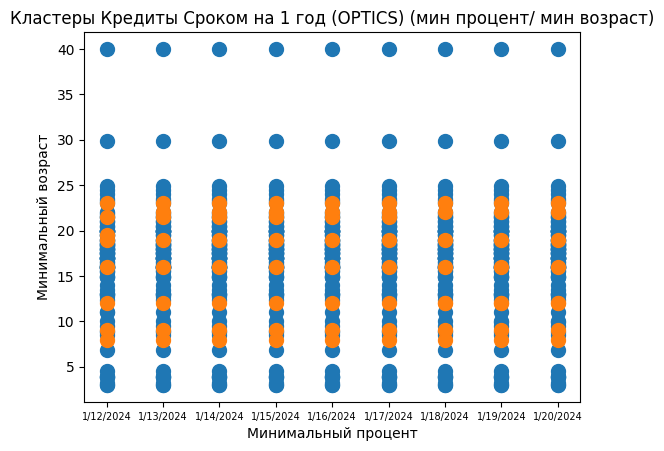

In [88]:
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('/content/sample_data/ALL_loans_1_year.csv')

# Выбор признаков для кластеризации
features = ['Минимальный процент', 'Максимальный процент', 'Минимальный возраст', 'Минимальная сумма', 'Максимальная сумма']
X = df[features]


# Запуск кластеризации OPTICS
optics = OPTICS(min_samples=5, xi=0.1, min_cluster_size=0.93)
df['Cluster'] = optics.fit_predict(X)

# Визуализация кластеров
unique_clusters = df['Cluster'].unique()
for cluster_id in unique_clusters:
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 2], s=100, label=f'Cluster {cluster_id+2}')

plt.title('Кластеры Кредиты Сроком на 1 год (OPTICS) (мин процент/ мин возраст)')
plt.xlabel('Минимальный процент')
plt.ylabel('Минимальный возраст')

plt.xticks(fontsize=7)

plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


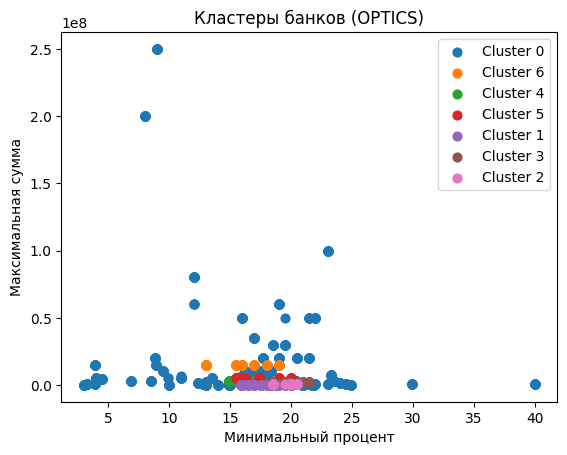

In [52]:
import pandas as pd
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('/content/sample_data/ALL_loans_1_year.csv')

# Выбор признаков для кластеризации
features = ['Минимальный процент', 'Максимальная сумма']
X = df[features]

# Запуск кластеризации OPTICS
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
df['Cluster'] = optics.fit_predict(X)

# Визуализация кластеров
unique_clusters = df['Cluster'].unique()
for cluster_id in unique_clusters:
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Минимальный процент'], cluster_data['Максимальная сумма'],
                s=40, label=f'Cluster {cluster_id+1}')

plt.title('Кластеры банков (OPTICS)')
plt.xlabel('Минимальный процент')
plt.ylabel('Максимальная сумма')

plt.legend()
plt.show()


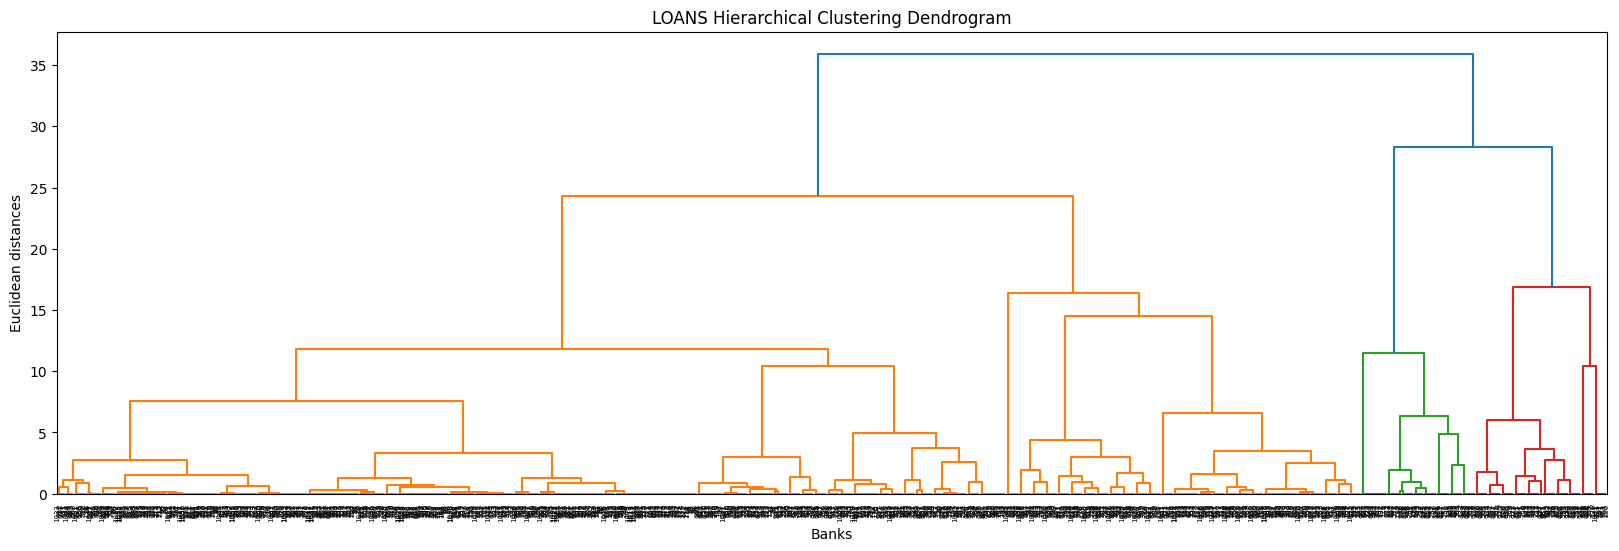

In [54]:
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Загрузка данных
df = pd.read_csv('/content/sample_data/ALL_loans_1_year.csv')

# Выбор числовых признаков для кластеризации
numeric_features = ['Минимальный процент', 'Максимальный процент']
X = df[numeric_features]

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

plt.figure(figsize=(20, 6))

# Построение дендрограммы
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))

plt.title('LOANS Hierarchical Clustering Dendrogram')
plt.xlabel('Banks')
plt.ylabel('Euclidean distances')
plt.show()



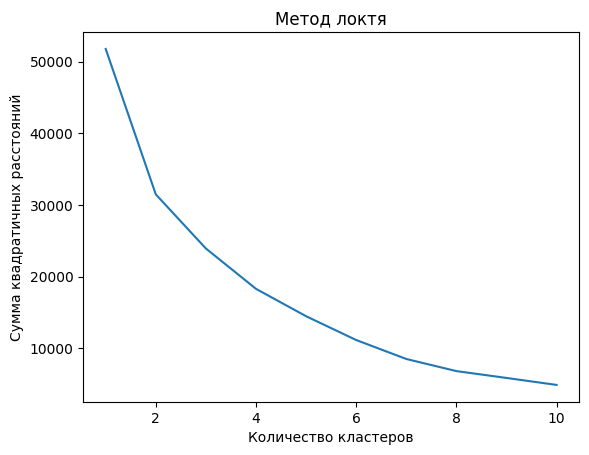

In [49]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Определение количества кластеров
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Визуализация метода локтя
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратичных расстояний')
plt.show()


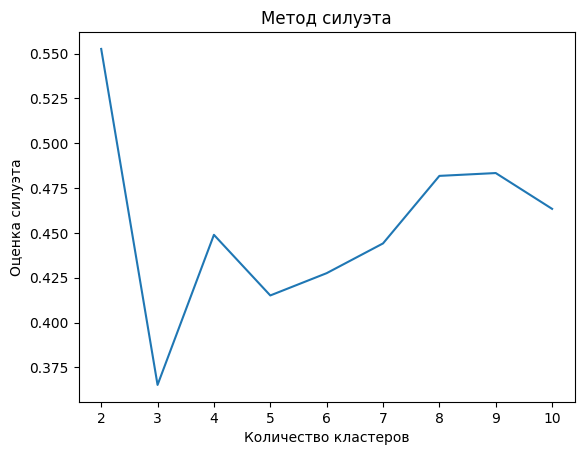

In [50]:
from sklearn.metrics import silhouette_score

# Определение количества кластеров с помощью силуэта
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Визуализация метода силуэта
plt.plot(range(2, 11), silhouette_scores)
plt.title('Метод силуэта')
plt.xlabel('Количество кластеров')
plt.ylabel('Оценка силуэта')
plt.show()


## DEPOSITS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


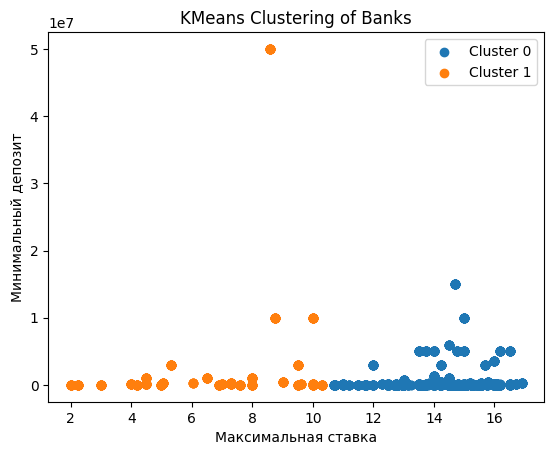

In [90]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Загружаем данные
df = pd.read_csv('/content/sample_data/AALL_deposits_1_year.csv')

# Выбираем только числовые признаки для кластеризации
numeric_features = ['Максимальная ставка', 'Минимальная ставка', 'Минимальный депозит']

# Выбираем только числовые признаки для кластеризации
X = df[numeric_features]

# Стандартизируем признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Указываем количество кластеров на основе данныз полученных из методов локтя и силуэта
num_clusters = 2

# Применяем кластеризацию KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Визуализируем кластеры
for cluster_id in range(num_clusters):
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data[numeric_features[0]], cluster_data[numeric_features[2]], label=f'Cluster {cluster_id}')

plt.xlabel(numeric_features[0])
plt.ylabel(numeric_features[2])
plt.title('KMeans Clustering of Banks')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


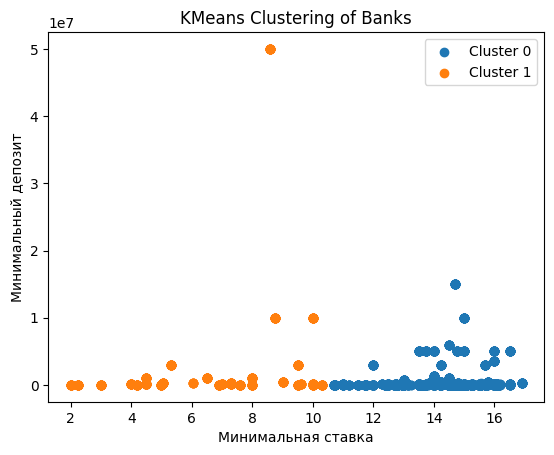

In [91]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Загружаем данные
df = pd.read_csv('/content/sample_data/AALL_deposits_1_year.csv')

# Выбираем только числовые признаки для кластеризации
numeric_features = ['Максимальная ставка', 'Минимальная ставка', 'Минимальный депозит']

# Выбираем только числовые признаки для кластеризации
X = df[numeric_features]

# Стандартизируем признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Указываем количество кластеров
num_clusters = 2

# Применяем кластеризацию KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Визуализируем кластеры
for cluster_id in range(num_clusters):
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data[numeric_features[1]], cluster_data[numeric_features[2]], label=f'Cluster {cluster_id}')

plt.xlabel(numeric_features[1])
plt.ylabel(numeric_features[2])
plt.title('KMeans Clustering of Banks')
plt.legend()
plt.show()


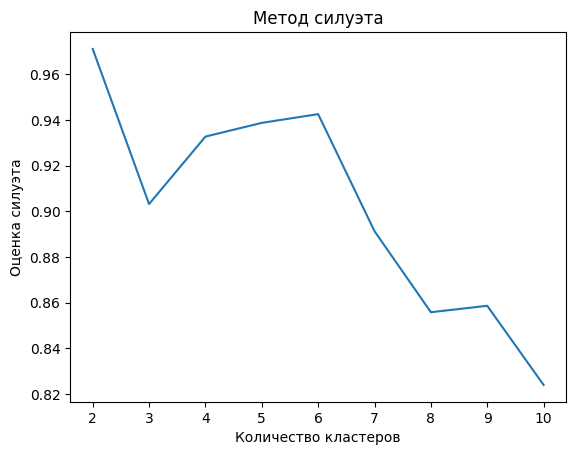

In [25]:
from sklearn.metrics import silhouette_score

# Определение количества кластеров с помощью силуэта
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Визуализация метода силуэта
plt.plot(range(2, 11), silhouette_scores)
plt.title('Метод силуэта')
plt.xlabel('Количество кластеров')
plt.ylabel('Оценка силуэта')
plt.show()

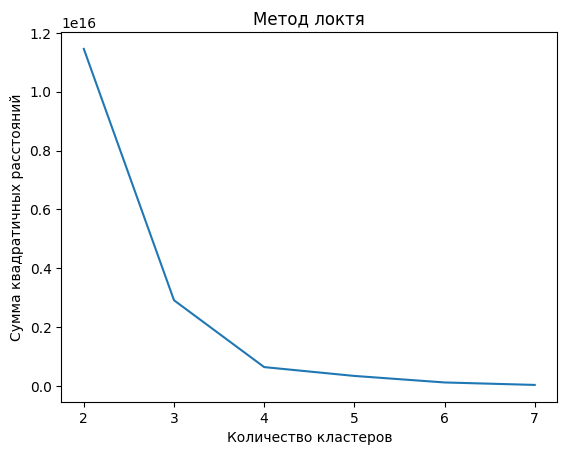

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Определение количества кластеров
wcss = []
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=400, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Визуализация метода локтя
plt.plot(range(2, 8), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратичных расстояний')
plt.show()


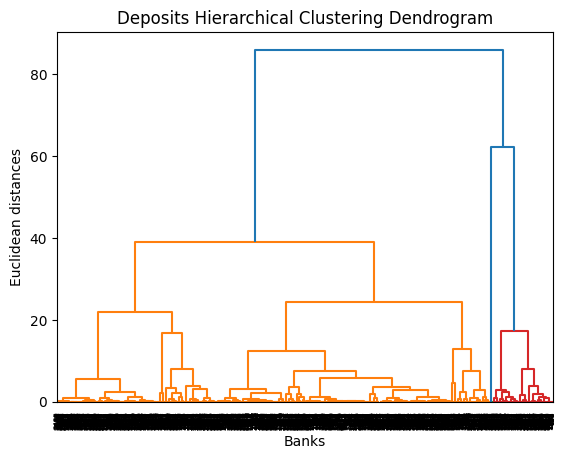

In [97]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Выбираем признаки для кластеризации
features = ['Максимальная ставка', 'Минимальная ставка', 'Минимальный депозит']
X = df[features]

# Построим дендрограмму
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))

plt.title('Deposits Hierarchical Clustering Dendrogram')
plt.xlabel('Banks')
plt.ylabel('Euclidean distances')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


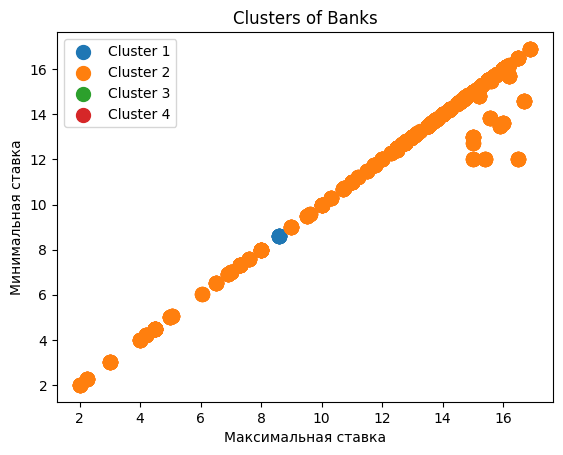

In [32]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Загружаем данные
df = pd.read_csv('/content/sample_data/AALL_deposits_1_year.csv')

# Выбор признаков для кластеризации
features = ['Максимальная ставка', 'Минимальная ставка', 'Минимальный депозит']
X = df[features]

# Иерархическая кластеризация
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

# Визуализация кластеров
for cluster_id in range(1,5):
    cluster_data = X[y_hc == cluster_id]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], s=100, label=f'Cluster {cluster_id}')

plt.title('Clusters of Banks')
plt.xlabel('Максимальная ставка')
plt.ylabel('Минимальная ставка')
plt.legend()
plt.show()


In [33]:
from sklearn.metrics import silhouette_score
#719 0,92
# Пример для min_samples=5, xi=0.05, min_cluster_size=0.05
optics = OPTICS(min_samples=5, xi=0.1, min_cluster_size=0.93)
df['Cluster'] = optics.fit_predict(X)
silhouette_avg = silhouette_score(X, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")




Silhouette Score: 0.9244942708721332


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


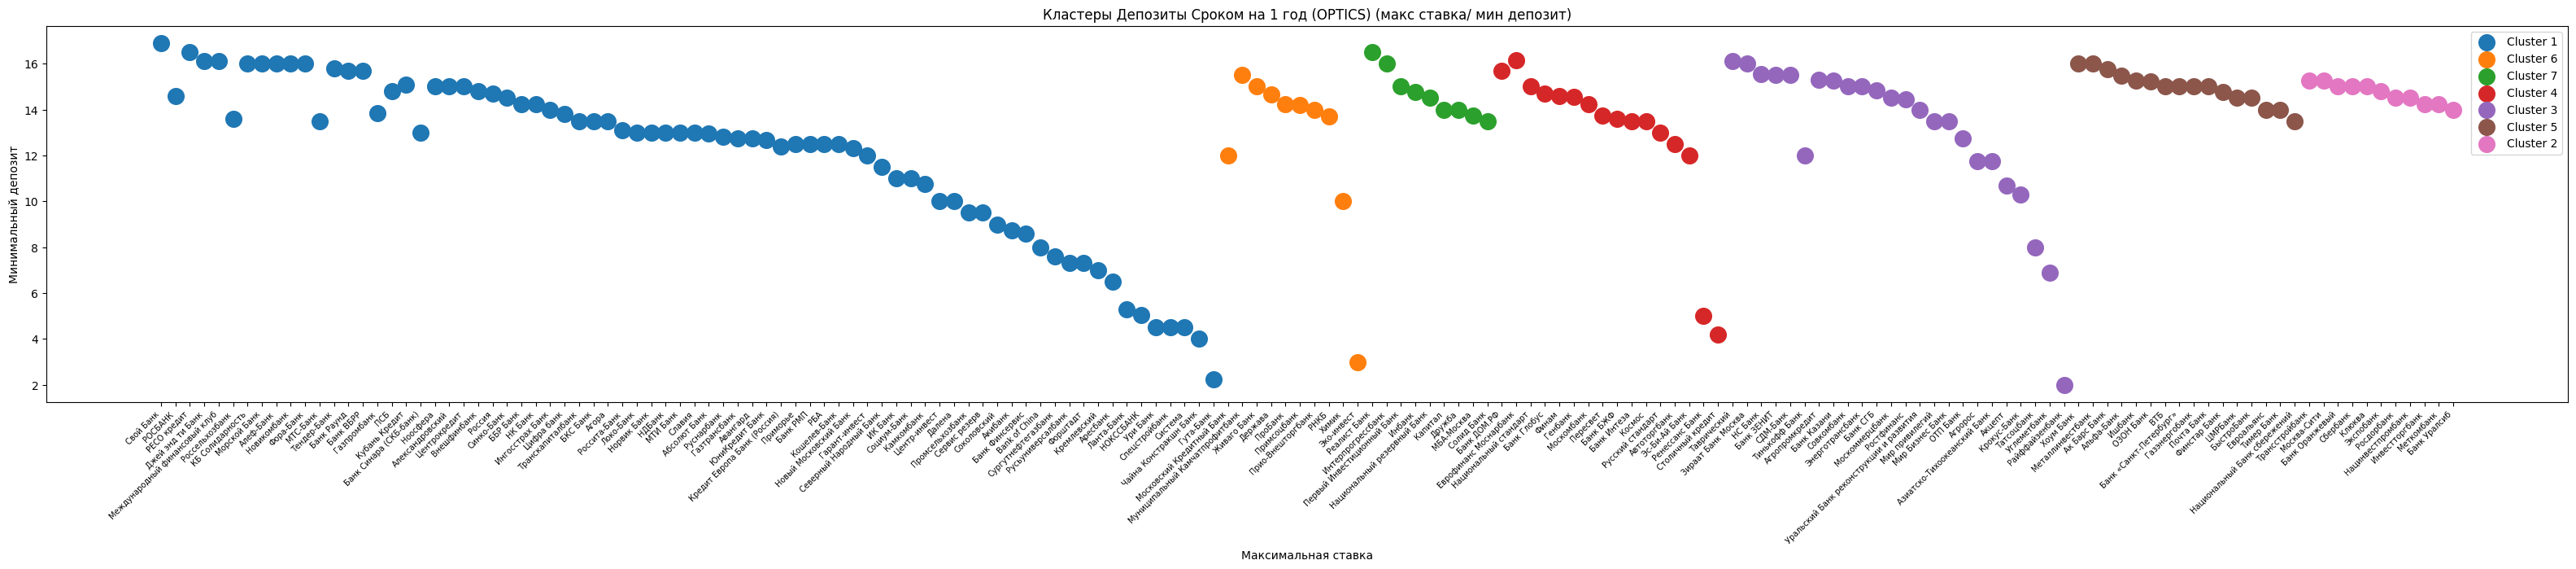

In [34]:
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('/content/sample_data/deposits_1_year_13_1_2024.csv')

# Выбор признаков для кластеризации
features = ['Максимальная ставка', 'Минимальная ставка', 'Минимальный депозит']
X = df[features]

plt.figure(figsize=(40, 6))

# Запуск кластеризации OPTICS
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
df['Cluster'] = optics.fit_predict(X)

# Визуализация кластеров
unique_clusters = df['Cluster'].unique()
for cluster_id in unique_clusters:
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 2], s=200, label=f'Cluster {cluster_id+2}')

# Замена названий банков на названия кластеров в легенде
plt.title('Кластеры Депозиты Сроком на 1 год (OPTICS) (макс ставка/ мин депозит)')
plt.xlabel('Максимальная ставка')
plt.ylabel('Минимальный депозит')

plt.xticks(rotation=45, ha='right', fontsize=7)

plt.legend()
plt.show()



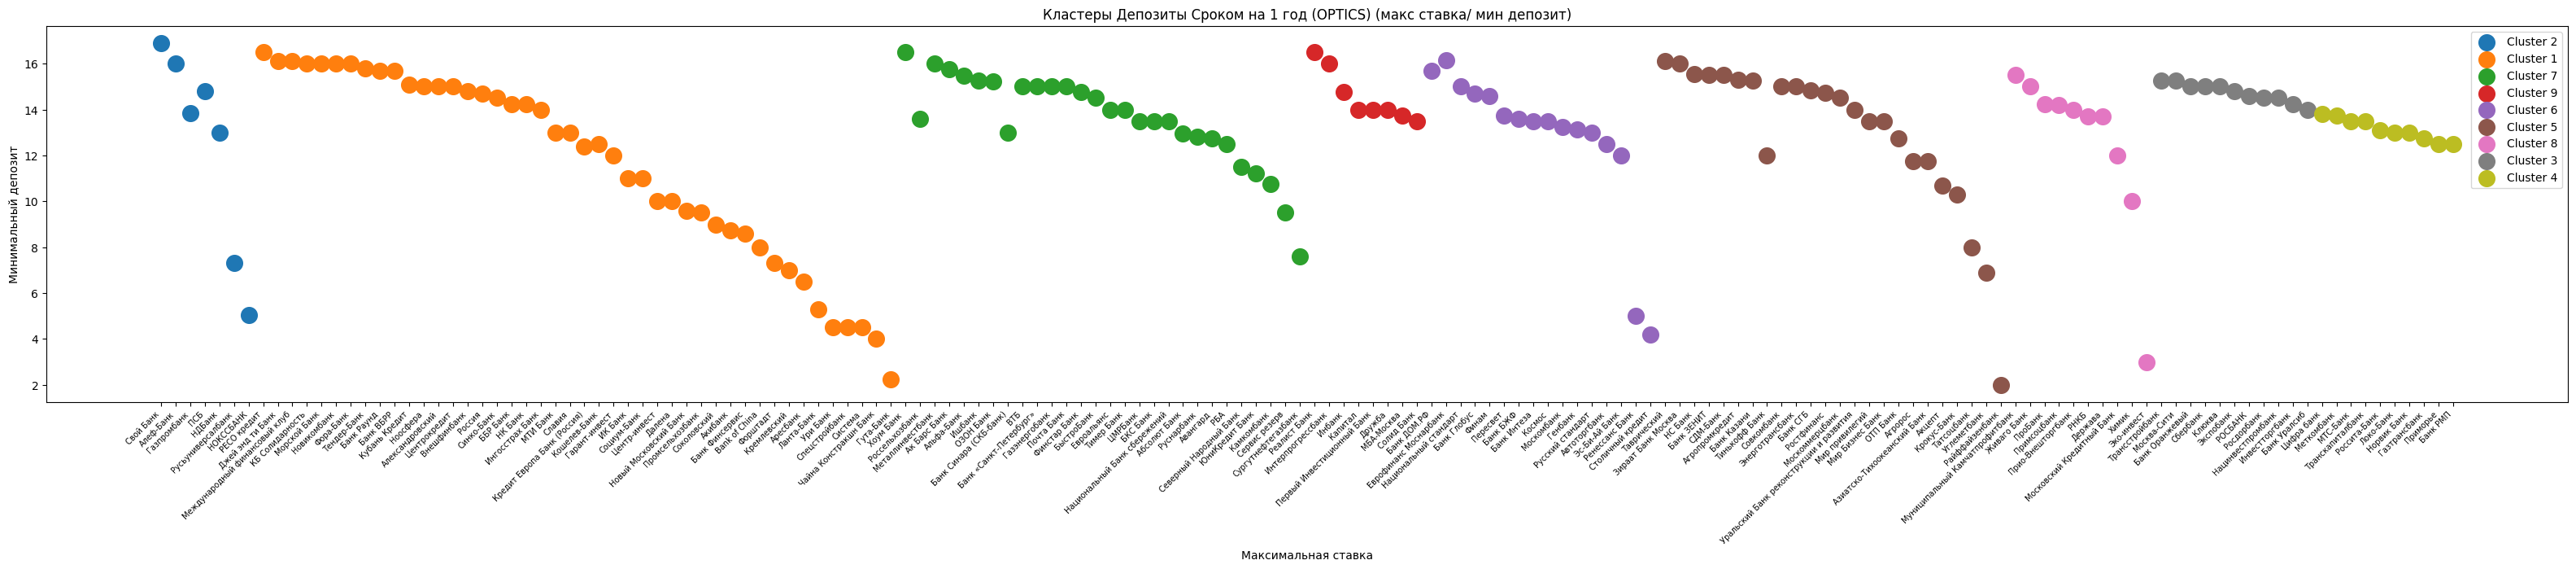

In [78]:
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('/content/sample_data/deposits_1_year_4_1_2024.csv')

# Выбор признаков для кластеризации
features = ['Максимальная ставка', 'Минимальная ставка', 'Минимальный депозит']
X = df[features]

plt.figure(figsize=(40, 6))

# Запуск кластеризации OPTICS
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
df['Cluster'] = optics.fit_predict(X)

# Визуализация кластеров
unique_clusters = df['Cluster'].unique()
for cluster_id in unique_clusters:
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 2], s=200, label=f'Cluster {cluster_id+2}')

# Замена названий банков на названия кластеров в легенде
plt.title('Кластеры Депозиты Сроком на 1 год (OPTICS) (макс ставка/ мин депозит)')
plt.xlabel('Максимальная ставка')
plt.ylabel('Минимальный депозит')

plt.xticks(rotation=45, ha='right', fontsize=7)

plt.legend()
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


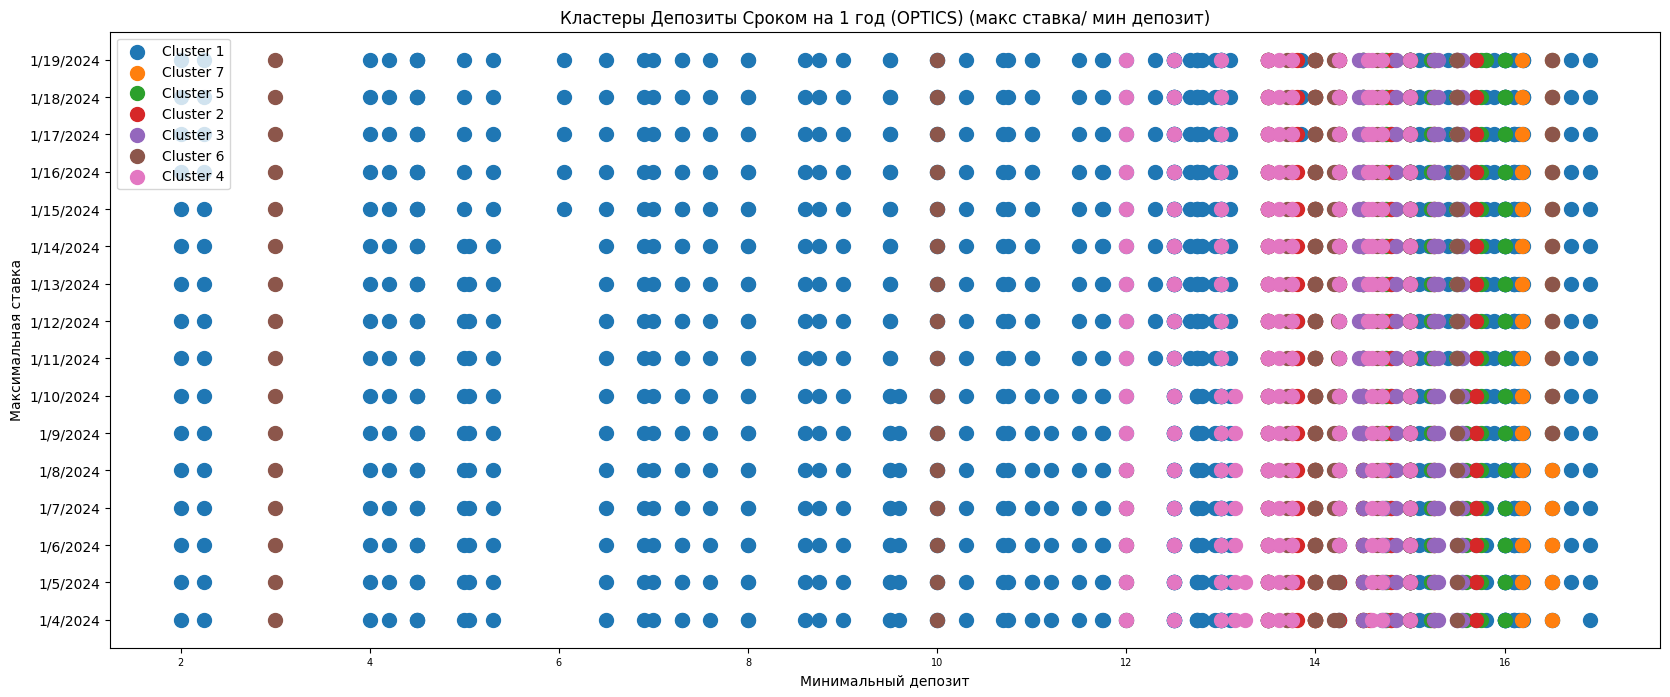

In [96]:
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('/content/sample_data/AALL_deposits_1_year.csv')

# Выбор признаков для кластеризации
features = ['Максимальная ставка', 'Минимальная ставка', 'Минимальный депозит']
X = df[features]

plt.figure(figsize=(20, 8))

# Запуск кластеризации OPTICS
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
df['Cluster'] = optics.fit_predict(X)

# Визуализация кластеров
unique_clusters = df['Cluster'].unique()
for cluster_id in unique_clusters:
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data.iloc[:, 2], cluster_data.iloc[:, 0], s=100, label=f'Cluster {cluster_id+2}')

# Замена названий банков на названия кластеров в легенде
plt.title('Кластеры Депозиты Сроком на 1 год (OPTICS) (макс ставка/ мин депозит)')
plt.xlabel('Минимальный депозит')
plt.ylabel('Максимальная ставка')

plt.xticks(fontsize=7)

plt.legend()
plt.show()



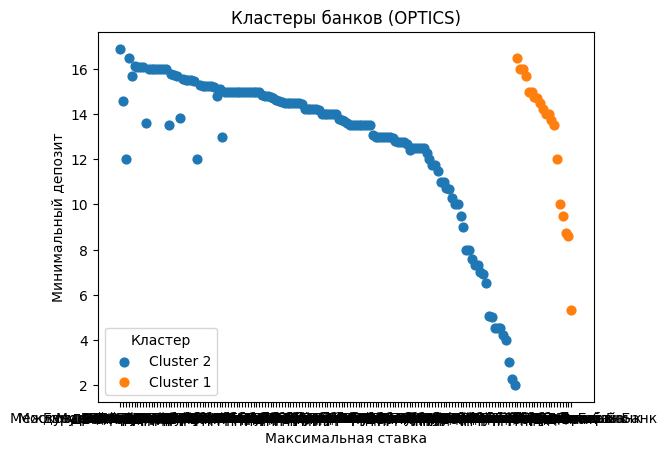

In [43]:
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('/content/sample_data/deposits_1_year_13_1_2024.csv')

# Выбор признаков для кластеризации
features = ['Максимальная ставка', 'Минимальная ставка', 'Минимальный депозит']
X = df[features]

# Запуск кластеризации OPTICS
optics = OPTICS(min_samples=8, xi=0.5, min_cluster_size=0.8)
df['Cluster'] = optics.fit_predict(X)

# Визуализация кластеров
unique_clusters = df['Cluster'].unique()
for cluster_id in unique_clusters:
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 2], s=40, label=f'Cluster {cluster_id+2}')

plt.title('Кластеры банков (OPTICS)')
plt.xlabel('Максимальная ставка')
plt.ylabel('Минимальный депозит')
plt.legend(title='Кластер')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


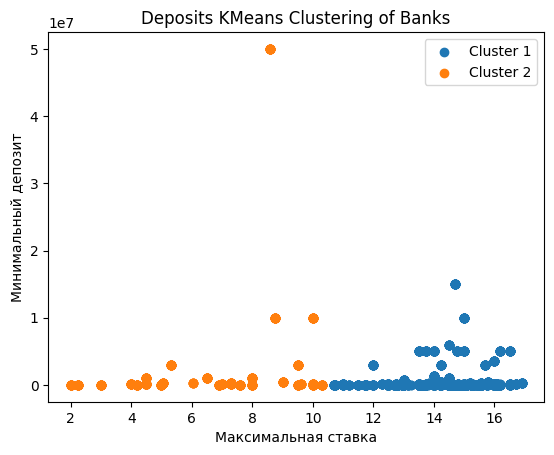

In [101]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Загружаем данные
df = pd.read_csv('/content/sample_data/AALL_deposits_1_year.csv', delimiter=',')

# Выбираем только числовые признаки для кластеризации
numeric_features = ['Максимальная ставка', 'Минимальная ставка', 'Минимальный депозит']


# Выбираем только числовые признаки для кластеризации
X = df[numeric_features]

# Стандартизируем признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Указываем количество кластеров
num_clusters = 2

# Применяем кластеризацию KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Визуализируем кластеры
for cluster_id in range(num_clusters):
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data[numeric_features[0]], cluster_data[numeric_features[2]], label=f'Cluster {cluster_id+1}')

plt.xlabel(numeric_features[0])
plt.ylabel(numeric_features[2])
plt.title('Deposits KMeans Clustering of Banks')
plt.legend()
plt.show()


In [38]:
from sklearn.metrics import silhouette_score

optics = OPTICS(min_samples=8, xi=0.5, min_cluster_size=0.8)
df['Cluster'] = optics.fit_predict(X)
silhouette_avg = silhouette_score(X, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.8558217551409755
